# 1. Introduction
Exploring a dataset from a multinational consultancy firm to analyze and predict employee attrition based on various attributes collected over a certain period.

# 2. Importing Necessary libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
palette_colors = sns.color_palette("tab10")
color1 = palette_colors[0] 
color2 = palette_colors[1]
colors = [color1, color2]

# 3. Load Dataset
Importing our Dataset and setting the Employee Number as the index

In [5]:
df = pd.read_csv("C:/Users/venka/Downloads/HR Data.xlsx - HR data.csv")
df.head(10)

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2
5,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-8,8,Male,Laboratory Technician,...,3,3,80,0,8,2,7,7,3,6
6,No,Travel_Rarely,Over 55,Current Employees,R&D,Medical,STAFF-10,10,Female,Laboratory Technician,...,4,1,80,3,12,2,1,0,0,0
7,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-11,11,Male,Laboratory Technician,...,4,2,80,1,1,3,1,0,0,0
8,No,Travel_Frequently,35 - 44,Current Employees,R&D,Life Sciences,STAFF-12,12,Male,Manufacturing Director,...,4,2,80,0,10,3,9,7,1,8
9,No,Travel_Rarely,35 - 44,Current Employees,R&D,Medical,STAFF-13,13,Male,Healthcare Representative,...,3,2,80,2,17,2,7,7,7,7


Drop rows with critical missing values

In [22]:
df = df.dropna(subset=['Department', 'Monthly Income', 'Years At Company', 'Years Since Last Promotion'])

Convert categorical columns to category type

In [24]:
categorical_cols = ['Department', 'Attrition', 'Gender', 'Job Role']
for col in categorical_cols:
    df[col] = df[col].astype('category')

Ensure numerical columns are correct type

In [30]:
numerical_cols = ['Monthly Income', 'Years At Company', 'Years Since Last Promotion', 'Age']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Handle outliers in Monthly Income (cap at 99th percentile)

In [31]:
income_cap = df['Monthly Income'].quantile(0.99)
df['Monthly Income'] = df['Monthly Income'].clip(upper=income_cap)

# 4. Preliminary Data Analysis
Data Dimensions / Data Types / Missing Values

In [25]:
df.shape

(1470, 39)

In [26]:
df.duplicated().any()

False

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Attrition                   1470 non-null   category
 1   Business Travel             1470 non-null   object  
 2   CF_age band                 1470 non-null   object  
 3   CF_attrition label          1470 non-null   object  
 4   Department                  1470 non-null   category
 5   Education Field             1470 non-null   object  
 6   emp no                      1470 non-null   object  
 7   Employee Number             1470 non-null   int64   
 8   Gender                      1470 non-null   category
 9   Job Role                    1470 non-null   category
 10  Marital Status              1470 non-null   object  
 11  Over Time                   1470 non-null   object  
 12  Over18                      1470 non-null   object  
 13  Training Times Las

# 5. Exploratory Data Analysis (EDA)

Set the max rows and columns to display

In [28]:
pd.options.display.max_rows = len(df)
pd.options.display.max_columns = len(df.columns)
df.describe()

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Monthly Rate,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,602.024335,1.289271,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,0.000000,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,3.000000,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,3.000000,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,6.000000,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


--- Summary Statistics ---

In [35]:
print("\nSummary Statistics by Department:")
summary_stats = df.groupby('Department').agg({
    'Monthly Income': ['mean', 'median', 'std'],
    'Years At Company': ['mean', 'median'],
    'Years Since Last Promotion': ['mean', 'median'],
    'Attrition': lambda x: (x == 'Yes').mean() * 100
}).round(2)
print(summary_stats)


Summary Statistics by Department:
           Monthly Income                  Years At Company         \
                     mean  median      std             mean median   
Department                                                           
HR                6652.41  3886.0  5783.94             7.24      5   
R&D               6279.38  4374.0  4890.68             6.86      5   
Sales             6957.72  5754.5  4054.17             7.28      6   

           Years Since Last Promotion        Attrition  
                                 mean median  <lambda>  
Department                                              
HR                               1.78      1     19.05  
R&D                              2.14      1     13.84  
Sales                            2.35      1     20.63  


## 5.1   Department-wise Attrition Rate

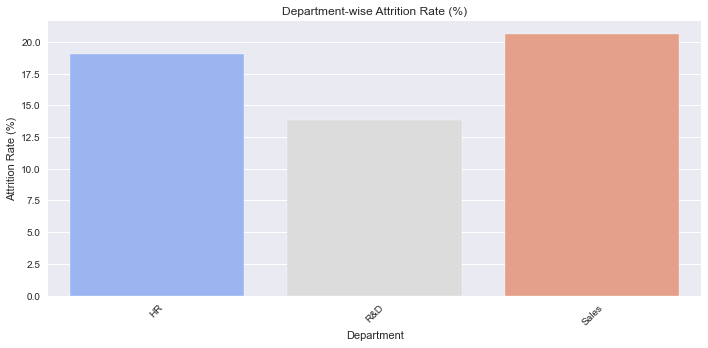

In [43]:
dept_attrition_counts = df[df['Attrition'] == 'Yes']['Department'].value_counts()
dept_total_counts = df['Department'].value_counts()
dept_attrition_rate = (dept_attrition_counts / dept_total_counts * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=dept_attrition_rate.index, y=dept_attrition_rate.values, palette='coolwarm')
plt.title('Department-wise Attrition Rate (%)')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.2 Salary Band vs Attrition

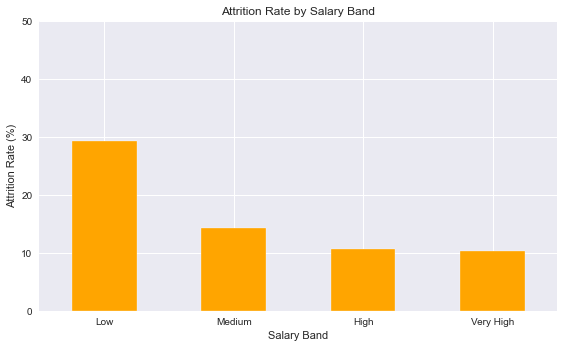

In [44]:
# Create salary bands using quartiles
df['Salary Band'] = pd.qcut(df['Monthly Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate attrition rate by salary band
salary_attrition = pd.crosstab(df['Salary Band'], df['Attrition'], normalize='index') * 100

# Plotting attrition rate for each salary band
salary_attrition['Yes'].plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Attrition Rate by Salary Band')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Salary Band')
plt.xticks(rotation=0)
plt.ylim(0, 50)
plt.tight_layout()
plt.show()

# 5.3 Promotions (Years Since Last Promotion vs Attrition)

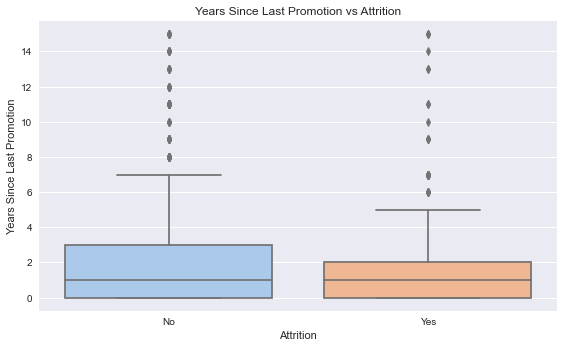

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='Years Since Last Promotion', data=df, palette='pastel')
plt.title("Years Since Last Promotion vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years Since Last Promotion")
plt.tight_layout()
plt.show()

# Result

In [5]:
# Load the data
df = pd.read_csv("C:/Users/venka/Downloads/HR Data.xlsx - HR data.csv")  # Adjust the filename if needed

# Drop irrelevant columns
df.drop(['Employee Number', 'emp no'], axis=1, errors='ignore', inplace=True)

# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical features
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[247   0]
 [  0  47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



# 6  classification model (Logistic Regression)

Import required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report


Load data

In [10]:
df = pd.read_csv("C:/Users/venka/Downloads/HR Data.xlsx - HR data.csv")

# 6.1 Confusion Matrix and ROC Curve

In [12]:
cm = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

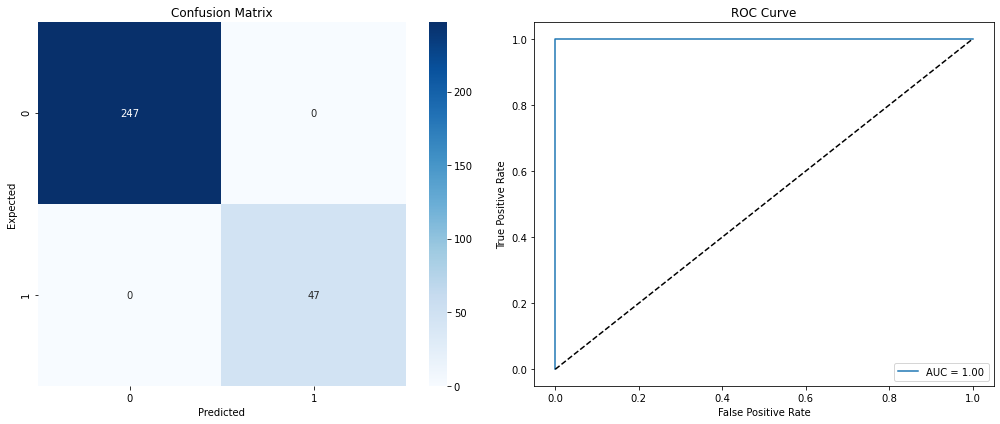

In [13]:
# Plot Confusion Matrix & ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Expected")

# ROC Curve
ax2.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
ax2.plot([0, 1], [0, 1], 'k--')
ax2.set_title("ROC Curve")
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

# 7 Decision Tree Classification Model

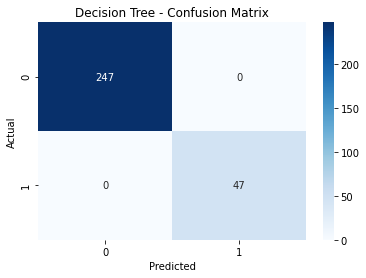

In [16]:
# Build and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [18]:
# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



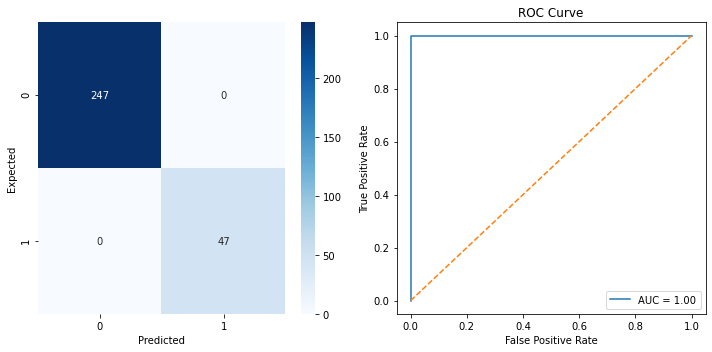

In [20]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Expected")

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

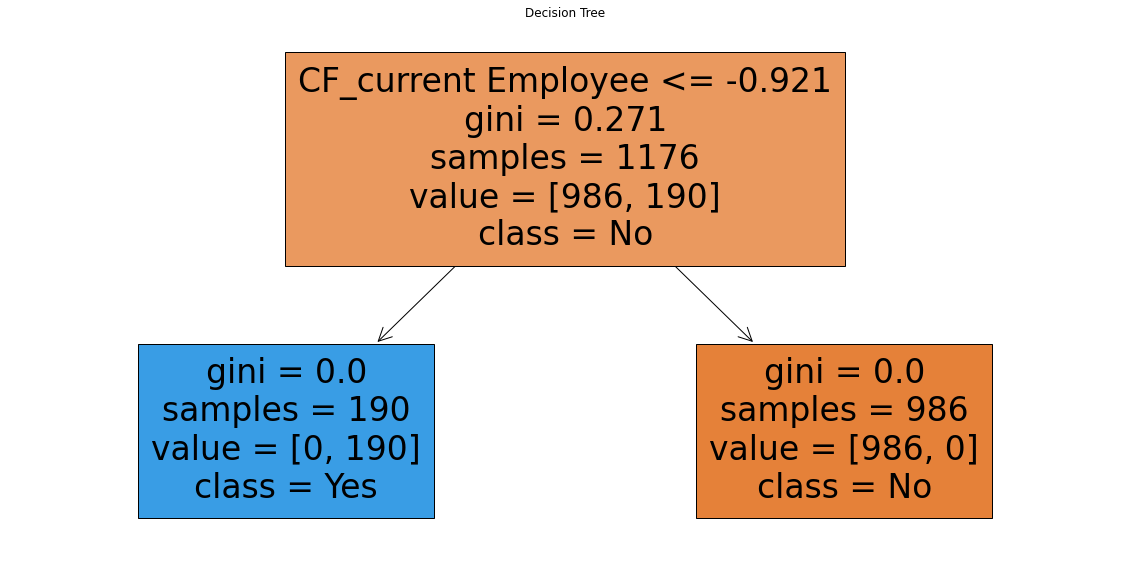

In [21]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()


# 8 SHAP value analysis

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

# Load data (use read_csv for .csv files)
try:
    data = pd.read_csv(r"C:\Users\venka\Downloads\HR Data.xlsx - HR data.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the file path and name.")
    exit()
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Drop irrelevant columns
data = data.drop(columns=['emp no', 'Employee Number', 'Over18', 'Employee Count', 'Standard Hours', 'CF_attrition label'], errors='ignore')

# Encode target
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# Features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Encode categorical columns
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


# SHAP values for first test instance
shap_df = pd.DataFrame({'Feature': X_test.columns, 'SHAP Value': shap_values[0]})
print(shap_df.sort_values(by='SHAP Value', ascending=False))

                       Feature  SHAP Value
17                   Job Level    0.088003
0              Business Travel    0.000000
1                  CF_age band    0.000000
30  Years Since Last Promotion    0.000000
29       Years In Current Role    0.000000
28            Years At Company    0.000000
27           Work Life Balance    0.000000
26         Total Working Years    0.000000
24   Relationship Satisfaction    0.000000
23          Performance Rating    0.000000
22         Percent Salary Hike    0.000000
21        Num Companies Worked    0.000000
20                Monthly Rate    0.000000
19              Monthly Income    0.000000
18            Job Satisfaction    0.000000
16             Job Involvement    0.000000
15                 Hourly Rate    0.000000
14    Environment Satisfaction    0.000000
13                   Education    0.000000
12          Distance From Home    0.000000
11                  Daily Rate    0.000000
9                          Age    0.000000
8     Train

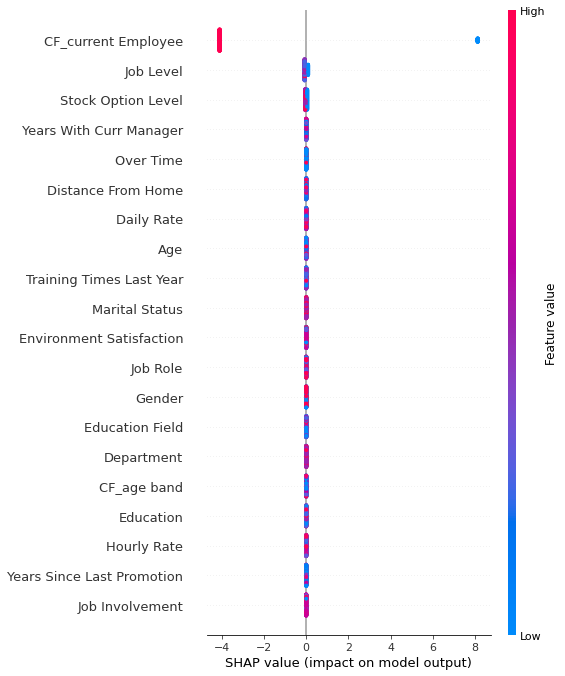

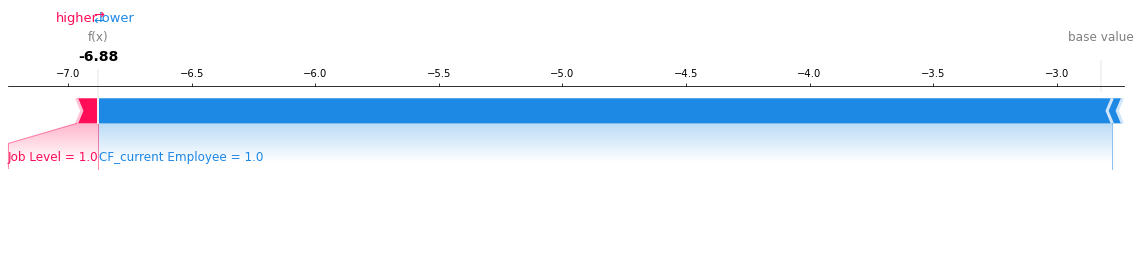

In [49]:
plt.figure()
shap.summary_plot(shap_values, X_test)
plt.savefig('shap_summary.png')
plt.close()

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0], matplotlib=True)
plt.savefig('shap_force.png')
plt.close()